<a href="https://colab.research.google.com/github/zxcasd945/test1/blob/main/02nn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         X1        X2  label
0  0.754246  0.231481      1
1 -0.756159  0.153259      1
2 -0.815392  0.173282      1
3 -0.393731  0.692883      1
4  0.442208 -0.896723      0
5 -0.479646  0.676435      1
6 -0.013648  0.803349      1
7  0.771513  0.147760      1
8 -0.169322 -0.793456      1
9 -0.121486  1.021509      0
[0.75424625 0.23148074] 1


tensor([1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
        1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
        1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
        0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
        1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1.,
        1., 1., 1., 0., 1., 0., 0., 0., 

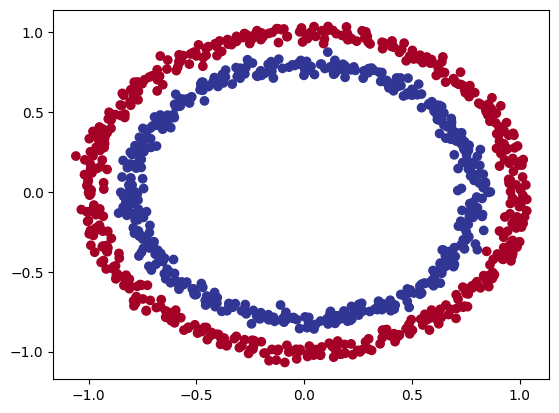

In [ ]:

from sklearn.datasets import make_circles

#Make 1000 samples
n_samples = 1000

#Create circles

X,y = make_circles(n_samples,
                   noise=0.03, #a little bit of noise to the dots
                   random_state=42) # random_state is same thing with random_seed

#Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({'X1':X[:,0],
                       'X2':X[:,1],
                       'label':y})
print(circles.head(10))

#Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

print(X[0],y[0])

import torch
X= torch.from_numpy(X).type(torch.float)
y= torch.from_numpy(y).type(torch.float)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2, random_state=42)
y_train



In [ ]:
# Build a model

from torch import nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2, out_features=10)
    self.layer2=nn.Linear(in_features=10, out_features=10)
    self.layer3=nn.Linear(in_features=10, out_features=1)
  def forward(self, x):
    return self.layer3(self.layer2(self.layer1(x)))

model_0 = CircleModelV0().to(device)

model_0 =model_0.to(device)

model_0.state_dict()


OrderedDict([('layer1.weight',
              tensor([[ 0.1001,  0.1324],
                      [ 0.2127,  0.2619],
                      [ 0.5193,  0.3871],
                      [ 0.2987, -0.1704],
                      [-0.0745, -0.2321],
                      [-0.0323, -0.6607],
                      [-0.6631,  0.5025],
                      [-0.5289, -0.1093],
                      [ 0.1223,  0.6669],
                      [ 0.3682, -0.1508]], device='cuda:0')),
             ('layer1.bias',
              tensor([ 0.2495, -0.2258,  0.2860, -0.1635,  0.5815,  0.4507, -0.1795,  0.6361,
                      -0.5061, -0.2387], device='cuda:0')),
             ('layer2.weight',
              tensor([[-0.0304,  0.1402,  0.1395,  0.0662, -0.0351,  0.2501, -0.0056, -0.0333,
                        0.0670, -0.2815],
                      [-0.1183,  0.0068,  0.2496,  0.1300,  0.0254,  0.0117, -0.2433, -0.0160,
                       -0.1506, -0.3133],
                      [-0.0496, -0.2801, 

In [ ]:
#loss and optimizer
loss_fn= nn.BCEWithLogitsLoss()
optimizer= torch.optim.SGD(params= model_0.parameters(),
                           lr=0.1)

#Calculate the accuracy
def accuracy_fn(y_true, y_pred):
  correct=torch.eq(y_true, y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

In [ ]:
torch.eq(torch.tensor([[1, 2], [3, 4]]), torch.tensor([[1, 1], [4, 4]])).sum().item()


2

In [ ]:
import torch
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device

    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train)
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}")

Epoch: 0 | Loss: 0.69605, Accuracy: 54.75% | Test loss: 0.70182, Test acc: 49.00
Epoch: 100 | Loss: 0.69325, Accuracy: 51.38% | Test loss: 0.69701, Test acc: 45.00
Epoch: 200 | Loss: 0.69305, Accuracy: 51.62% | Test loss: 0.69577, Test acc: 47.00
Epoch: 300 | Loss: 0.69300, Accuracy: 51.50% | Test loss: 0.69522, Test acc: 45.50
Epoch: 400 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69496, Test acc: 45.50
Epoch: 500 | Loss: 0.69298, Accuracy: 51.38% | Test loss: 0.69482, Test acc: 45.50
Epoch: 600 | Loss: 0.69298, Accuracy: 51.25% | Test loss: 0.69476, Test acc: 45.50
Epoch: 700 | Loss: 0.69298, Accuracy: 51.25% | Test loss: 0.69472, Test acc: 46.00
Epoch: 800 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69470, Test acc: 46.00
Epoch: 900 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69469, Test acc: 46.00


Downloading


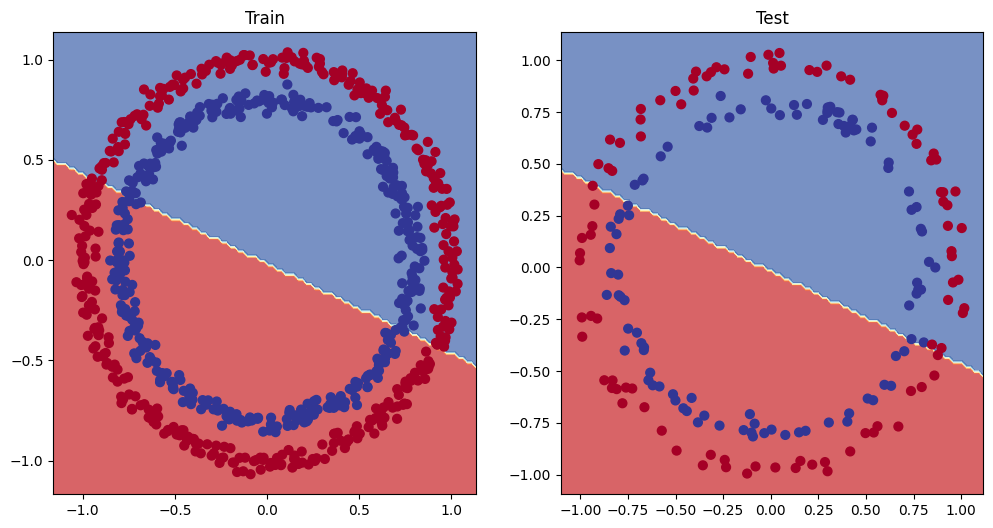

In [ ]:
import requests
from pathlib import Path
if Path('helper_functions.py').is_file():
  print('No need to download')
else:
  print('Downloading')
  request=requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
with open ('helper_function.py', 'wb') as f:
  f.write(request.content)
from helper_function import plot_predictions, plot_decision_boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_0, X_test, y_test)

Epoch: 0 | Loss: 0.69815, Accuracy: 50.00% | Test Loss: 0.69751, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69235, Accuracy: 52.75% | Test Loss: 0.69194, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.69199, Accuracy: 52.25% | Test Loss: 0.69149, Test Accuracy: 53.00%
Epoch: 300 | Loss: 0.69152, Accuracy: 52.38% | Test Loss: 0.69089, Test Accuracy: 53.00%
Epoch: 400 | Loss: 0.69083, Accuracy: 52.50% | Test Loss: 0.69005, Test Accuracy: 53.50%
Epoch: 500 | Loss: 0.68983, Accuracy: 52.75% | Test Loss: 0.68883, Test Accuracy: 54.00%
Epoch: 600 | Loss: 0.68845, Accuracy: 53.62% | Test Loss: 0.68718, Test Accuracy: 53.50%
Epoch: 700 | Loss: 0.68673, Accuracy: 53.75% | Test Loss: 0.68506, Test Accuracy: 53.50%
Epoch: 800 | Loss: 0.68448, Accuracy: 54.25% | Test Loss: 0.68231, Test Accuracy: 54.00%
Epoch: 900 | Loss: 0.68150, Accuracy: 54.75% | Test Loss: 0.67857, Test Accuracy: 54.00%
Epoch: 1000 | Loss: 0.67715, Accuracy: 56.00% | Test Loss: 0.67315, Test Accuracy: 56.50%
Epoch: 1100 | Loss: 0.

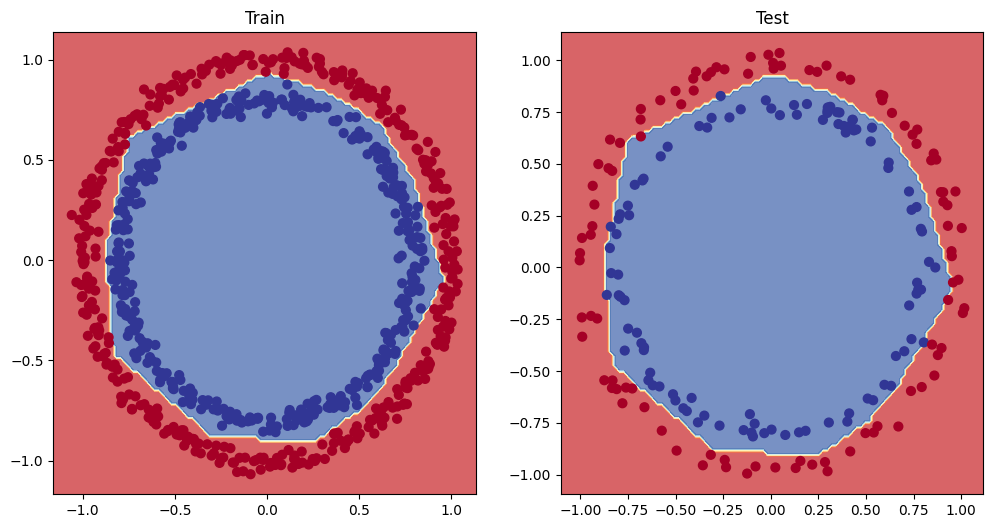

In [ ]:
from sklearn.datasets import make_circles

#Make 1000 samples
n_samples = 1000

#Create circles

X,y = make_circles(n_samples,
                   noise=0.03, #a little bit of noise to the dots
                   random_state=42) # random_state is same thing with random_seed
import torch
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=10)
    self.layer_4 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()
  def forward(self, x):
    return self.layer_4(self.relu(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))))

model_3= CircleModelV2().to(device)
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)
torch.manual_seed(42)
epochs = 3000
for epoch in range(epochs):
   y_logits = model_3(X_train).squeeze()
   y_pred = torch.round(torch.sigmoid(y_logits))
   loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
   acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
   optimizer.zero_grad()

    # 4. Loss backward
   loss.backward()

    # 5. Optimizer step
   optimizer.step()

    ### Testing
   model_3.eval()
   with torch.inference_mode():
      # 1. Forward pass
     test_logits = model_3(X_test).squeeze()
     test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
     test_loss = loss_fn(test_logits, y_test)
     test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
   if epoch % 100 == 0:
       print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity


In [ ]:
A= torch.randn(2,2)
B = torch.arange(-10, 10,  1)
def sigmoid(x):
  return 1/(1+torch.exp(-x))




Epoch:0| Loss:1.1588265895843506,Accuracy:40.375% | Test loss:1.0755419731140137, Test Accuracy:48.0%
Epoch:10| Loss:0.6447554230690002,Accuracy:96.75% | Test loss:0.6606872081756592, Test Accuracy:97.5%
Epoch:20| Loss:0.42535150051116943,Accuracy:98.5% | Test loss:0.43074119091033936, Test Accuracy:100.0%
Epoch:30| Loss:0.2529423236846924,Accuracy:99.125% | Test loss:0.24507619440555573, Test Accuracy:99.5%
Epoch:40| Loss:0.11232151091098785,Accuracy:99.25% | Test loss:0.10228516906499863, Test Accuracy:99.5%
Epoch:50| Loss:0.06626511365175247,Accuracy:99.25% | Test loss:0.058475375175476074, Test Accuracy:99.5%
Epoch:60| Loss:0.05068015679717064,Accuracy:99.25% | Test loss:0.042932283133268356, Test Accuracy:99.5%
Epoch:70| Loss:0.042996764183044434,Accuracy:99.25% | Test loss:0.03490966185927391, Test Accuracy:99.5%
Epoch:80| Loss:0.038361385464668274,Accuracy:99.25% | Test loss:0.029878225177526474, Test Accuracy:99.5%
Epoch:90| Loss:0.03524843230843544,Accuracy:99.25% | Test loss:

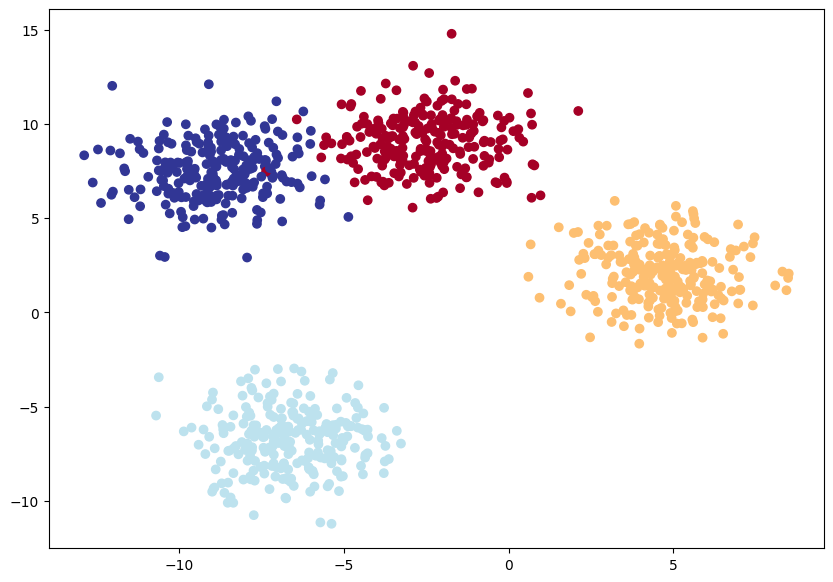

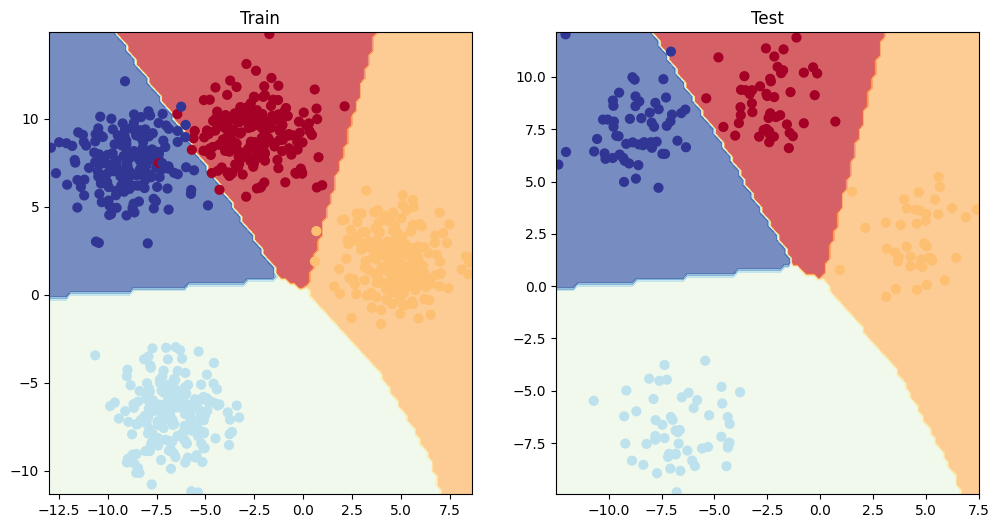

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

device = "cuda" if torch.cuda.is_available() else "cpu"
from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features))

    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(),
                            lr=0.1)

torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 100
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  model_4.train()
  y_logits=model_4(X_blob_train)
  y_pred=torch.softmax(y_logits, dim=1).argmax(dim=1)
  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true= y_blob_train, y_pred= y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc =accuracy_fn(y_true= y_blob_test, y_pred=test_pred)
  if epoch%10 == 0:
    print(f'Epoch:{epoch}| Loss:{loss},Accuracy:{acc}% | Test loss:{test_loss}, Test Accuracy:{test_acc}%')
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

print(X_blob_train.dtype, y_blob_train.dtype,X_blob_train[:10], y_blob_test[:10])



In [2]:
!git config --global user.name "zxcasd945"
!git config --global user.email "zxcasd945@yahoo.com.tw"
!git config --global user.password "d86Y7j3i16"

# New Section

# New Section